In [228]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,RMSprop
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [229]:
# load and process
def load_and_preprocess(data_path):
    data = pd.read_csv(data_path)
    data = data.values 
    np.random.shuffle(data)
    x = data[:,1:].reshape(-1,28,28,1)/255.0  
    y = data[:,0].astype(np.int32) 
    y = to_categorical(y, num_classes=len(set(y))) 
    
    return x,y

In [230]:
train_data_path = "C:/Users/Casper/Downloads/Fashiondataset/fashion-mnist_train.csv"
test_data_path ="C:/Users/Casper/Downloads/Fashiondataset/fashion-mnist_test.csv"

In [231]:
x_train, y_train = load_and_preprocess(train_data_path)
x_test, y_test = load_and_preprocess(test_data_path)

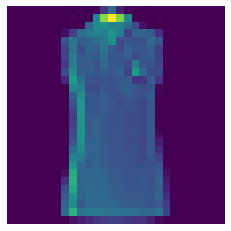

0


In [232]:
index = 3 
vis = x_train.reshape(60000,28,28) 
plt.imshow(vis[index,:,:])
plt.legend
plt.axis("off")
plt.show()
print(np.argmax(y_train[index]))

In [233]:
numberOfClass = y_train.shape[1]

model = Sequential()

model.add(Conv2D(input_shape =(28,28,1),filters =16, padding="Same",kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(filters=32,padding="Same",kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(filters=64,padding="Same",kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(units = 784)) 
model.add(Activation("relu"))
model.add(Dropout(0.25))
model.add(Dense(units= numberOfClass)) 
model.add(Activation("softmax"))


model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [234]:
# Adam optimizer
optimizer = Adam(learning_rate= 0.001, beta_1 = 0.9, beta_2= 0.999)

In [235]:
model.compile( optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [236]:
# Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=5, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False) 

datagen.fit(x_train)

In [237]:
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=50,batch_size=3000)

Epoch 1/50
20/20 [==============================] - 2s 78ms/step - loss: 1.2620 - accuracy: 0.5735 - val_loss: 2.1472 - val_accuracy: 0.4814
Epoch 2/50
20/20 [==============================] - 1s 70ms/step - loss: 0.6420 - accuracy: 0.7595 - val_loss: 2.1637 - val_accuracy: 0.1774
Epoch 3/50
20/20 [==============================] - 1s 70ms/step - loss: 0.5366 - accuracy: 0.8009 - val_loss: 2.2235 - val_accuracy: 0.1815
Epoch 4/50
20/20 [==============================] - 1s 71ms/step - loss: 0.4778 - accuracy: 0.8264 - val_loss: 2.2802 - val_accuracy: 0.1781
Epoch 5/50
20/20 [==============================] - 1s 70ms/step - loss: 0.4431 - accuracy: 0.8388 - val_loss: 2.3256 - val_accuracy: 0.1605
Epoch 6/50
20/20 [==============================] - 1s 70ms/step - loss: 0.4120 - accuracy: 0.8493 - val_loss: 2.3998 - val_accuracy: 0.2402
Epoch 7/50
20/20 [==============================] - 1s 70ms/step - loss: 0.3915 - accuracy: 0.8567 - val_loss: 2.4333 - val_accuracy: 0.2296
Epoch 8/50
20

In [238]:
model.save_weights('fashion_dataset.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


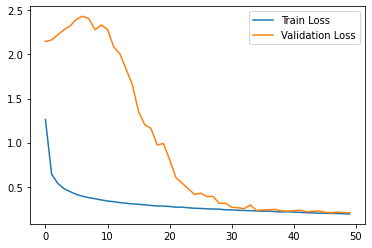

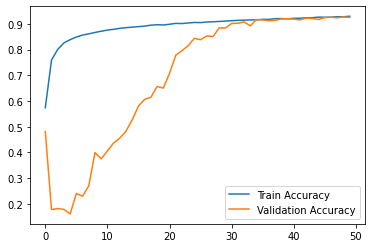

In [239]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label="Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label="Train Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.show()

In [243]:
#%% save history

import json
with open("fashion_dataset.json","w") as f:
    json.dump(hist.history,f)
    

In [244]:
#%% load history

import codecs 
with codecs.open("fashion_dataset.json","r",encoding = "utf-8") as f:
    hs = json.loads(f.read())  

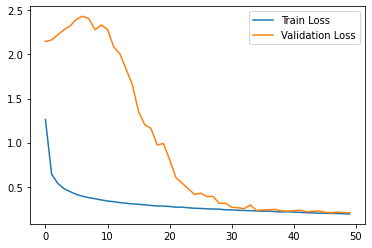

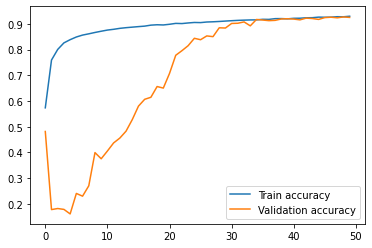

In [245]:
plt.figure()
plt.plot(hs["loss"],label = "Train Loss")
plt.plot(hs["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

plt.figure()

plt.plot(hs["accuracy"],label="Train accuracy")
plt.plot(hs["val_accuracy"],label="Validation accuracy")
plt.legend()
plt.show()

#### Dataset Kaggle Link

https://www.kaggle.com/datasets/zalando-research/fashionmnist